In [ ]:
! pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 16.2 MB/s eta 0:00:00


In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
import pandas as pd
import tensorflow_addons as tfa
import tensorflow.keras.optimizers as optimizer
import seaborn as sns

from keras import layers
from keras.applications import MobileNetV3Large
from keras.callbacks import Callback, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras import optimizers

import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Split Data

In [ ]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
cd /content/drive/MyDrive/Dataset Stroberi/

/content/drive/.shortcut-targets-by-id/1VcMAB8Y8ZPDceSDIjUGi5oxujM5YUap4/Dataset Stroberi


In [ ]:
# !splitfolders Dataset-crop-compress --ratio .7 .2 .1 --output 'output-crop-compress2'

In [ ]:
# !cp -av '/content/drive/MyDrive/Dataset Stroberi/Dataset-output' 'Dataset-output'

In [ ]:
# TRAINING_DIR = 'output/train'
# TEST_DIR = 'output/test'
# VAL_DIR = 'output/val'

In [ ]:
TRAINING_DIR = 'output-crop-compress2/train'
TEST_DIR = 'output-crop-compress2/test'
VAL_DIR = 'output-crop-compress2/val'

# Preprocessing

In [ ]:
BATCH_SIZE = 32
TARGET_SIZE = (224,224)

train_gen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1,
)

datagen = ImageDataGenerator()

In [ ]:
train_ds = train_gen.flow_from_directory(TRAINING_DIR,
                                        batch_size = BATCH_SIZE,
                                        shuffle = True,
                                        target_size = TARGET_SIZE,
                                        class_mode = 'categorical')
test_ds = datagen.flow_from_directory(TEST_DIR,
                                        batch_size = BATCH_SIZE,
                                        shuffle = False,
                                        target_size = TARGET_SIZE,
                                        class_mode = 'categorical')
val_ds = datagen.flow_from_directory(VAL_DIR,
                                        batch_size = BATCH_SIZE,
                                        shuffle = True,
                                        target_size = TARGET_SIZE,
                                        class_mode = 'categorical')

Found 932 images belonging to 4 classes.
Found 140 images belonging to 4 classes.
Found 264 images belonging to 4 classes.


In [ ]:
train_ds.next()

(array([[[[198.     , 199.     , 201.     ],
          [198.     , 199.     , 201.     ],
          [198.     , 199.     , 201.     ],
          ...,
          [214.01749, 217.61269, 221.42229],
          [214.00055, 218.00055, 221.00055],
          [214.59315, 218.59315, 221.59315]],
 
         [[198.     , 199.     , 201.     ],
          [198.     , 199.     , 201.     ],
          [198.     , 199.     , 201.     ],
          ...,
          [213.77885, 217.4193 , 221.13843],
          [214.00024, 218.00024, 221.00024],
          [214.63838, 218.63838, 221.63838]],
 
         [[198.54108, 199.54108, 201.54108],
          [198.49583, 199.49583, 201.49583],
          [198.45059, 199.45059, 201.45059],
          ...,
          [213.68724, 217.     , 221.37448],
          [213.84189, 217.68465, 220.99913],
          [214.37367, 218.37367, 221.37367]],
 
         ...,
 
         [[187.45592, 188.45592, 192.45592],
          [188.     , 189.     , 193.     ],
          [186.36682, 187.3668

In [ ]:
val_ds.next()

(array([[[[204., 209., 213.],
          [207., 210., 215.],
          [206., 209., 216.],
          ...,
          [211., 212., 216.],
          [212., 213., 217.],
          [211., 212., 216.]],
 
         [[205., 210., 214.],
          [205., 208., 213.],
          [207., 210., 217.],
          ...,
          [209., 213., 216.],
          [212., 213., 217.],
          [211., 212., 216.]],
 
         [[204., 209., 213.],
          [204., 209., 213.],
          [204., 209., 213.],
          ...,
          [209., 213., 216.],
          [208., 212., 215.],
          [210., 214., 217.]],
 
         ...,
 
         [[193., 198., 204.],
          [196., 201., 207.],
          [193., 198., 204.],
          ...,
          [207., 208., 210.],
          [207., 208., 210.],
          [208., 209., 211.]],
 
         [[194., 199., 205.],
          [194., 199., 205.],
          [192., 197., 203.],
          ...,
          [206., 207., 209.],
          [207., 208., 210.],
          [206., 207., 209.

In [ ]:
test_ds.next()

(array([[[[235., 239., 242.],
          [236., 240., 243.],
          [234., 239., 243.],
          ...,
          [243., 244., 246.],
          [243., 244., 246.],
          [243., 244., 246.]],
 
         [[237., 241., 244.],
          [237., 241., 244.],
          [237., 240., 245.],
          ...,
          [243., 244., 248.],
          [242., 246., 249.],
          [245., 246., 250.]],
 
         [[236., 240., 243.],
          [236., 240., 243.],
          [237., 241., 244.],
          ...,
          [244., 245., 249.],
          [241., 246., 249.],
          [244., 245., 249.]],
 
         ...,
 
         [[230., 235., 239.],
          [233., 236., 241.],
          [234., 237., 242.],
          ...,
          [244., 248., 251.],
          [244., 248., 251.],
          [245., 249., 250.]],
 
         [[231., 236., 240.],
          [230., 233., 238.],
          [233., 236., 241.],
          ...,
          [244., 248., 251.],
          [244., 248., 251.],
          [245., 249., 252.

# Labeling

In [ ]:
train_ds.class_indices

{'embun tepung': 0, 'mite': 1, 'normal': 2, 'ulat': 3}

In [ ]:
labels = {0 : 'Embun Tepung', 1 : 'Mite', 2 : 'Normal', 3 : 'Ulat'}

In [ ]:
class_names = list(train_ds.class_indices)
class_names

['embun tepung', 'mite', 'normal', 'ulat']

In [ ]:
n_class_names = len(class_names)
n_class_names

4

In [ ]:
for image_batch, label_batch in train_ds :
  print(image_batch[0])
  print(label_batch[0])
  print(image_batch[0].shape)
  break

[[[237.      242.      248.     ]
  [237.      242.      248.     ]
  [237.      242.      248.     ]
  ...
  [253.      253.      253.     ]
  [253.      253.      253.     ]
  [253.      253.      253.     ]]

 [[237.56139 242.56139 247.43861]
  [237.35808 242.35808 247.64192]
  [237.15477 242.15477 247.84523]
  ...
  [253.      253.      253.     ]
  [253.      253.      253.     ]
  [253.      253.      253.     ]]

 [[237.45949 242.45949 246.45949]
  [237.66281 242.66281 246.66281]
  [237.86612 242.86612 246.86612]
  ...
  [253.      253.      253.     ]
  [253.      253.      253.     ]
  [253.      253.      253.     ]]

 ...

 [[241.74605 244.74605 249.74605]
  [241.27484 244.27484 249.27484]
  [241.70428 244.70428 249.70428]
  ...
  [255.      255.      255.     ]
  [255.      255.      255.     ]
  [255.      255.      255.     ]]

 [[241.94936 244.94936 249.94936]
  [241.07152 244.07152 249.07152]
  [241.9076  244.9076  249.9076 ]
  ...
  [255.      255.      255.     ]
  [2

<Axes: ylabel='count'>

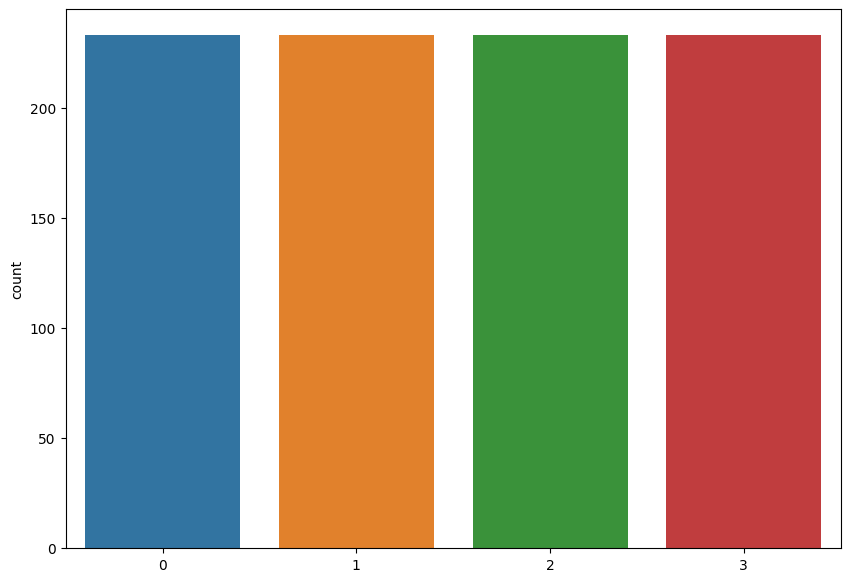

In [ ]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.countplot(x = train_ds.classes)

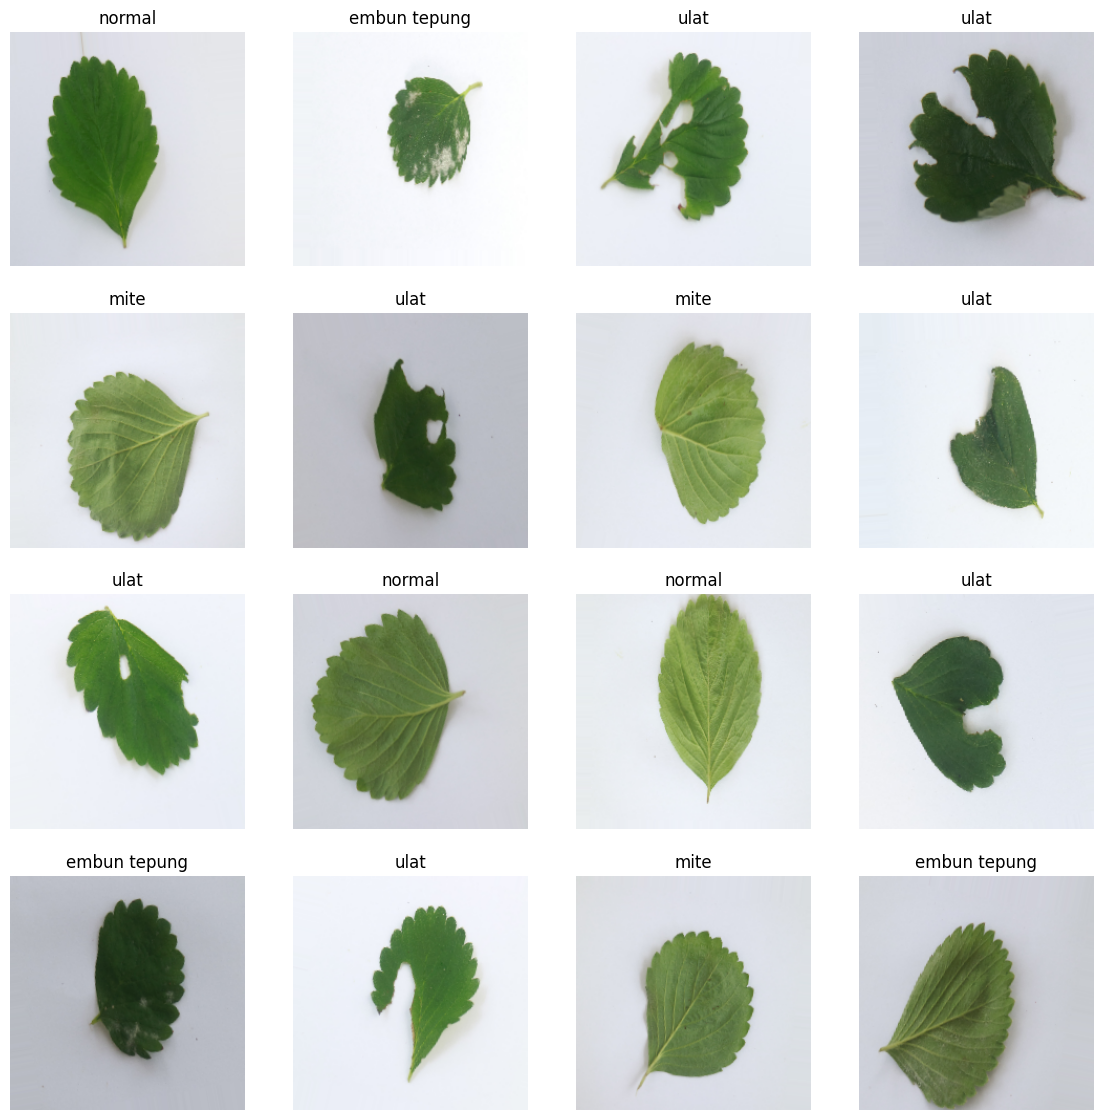

In [ ]:
x,y = next(train_ds)

# function to plot images
def plotImages(x,y):
    plt.figure(figsize=(14,14))
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.imshow(x[i].astype("uint8"))
        plt.title(class_names[np.argmax(y[i])])
        plt.axis("off")
    plt.show()

plotImages(x,y)

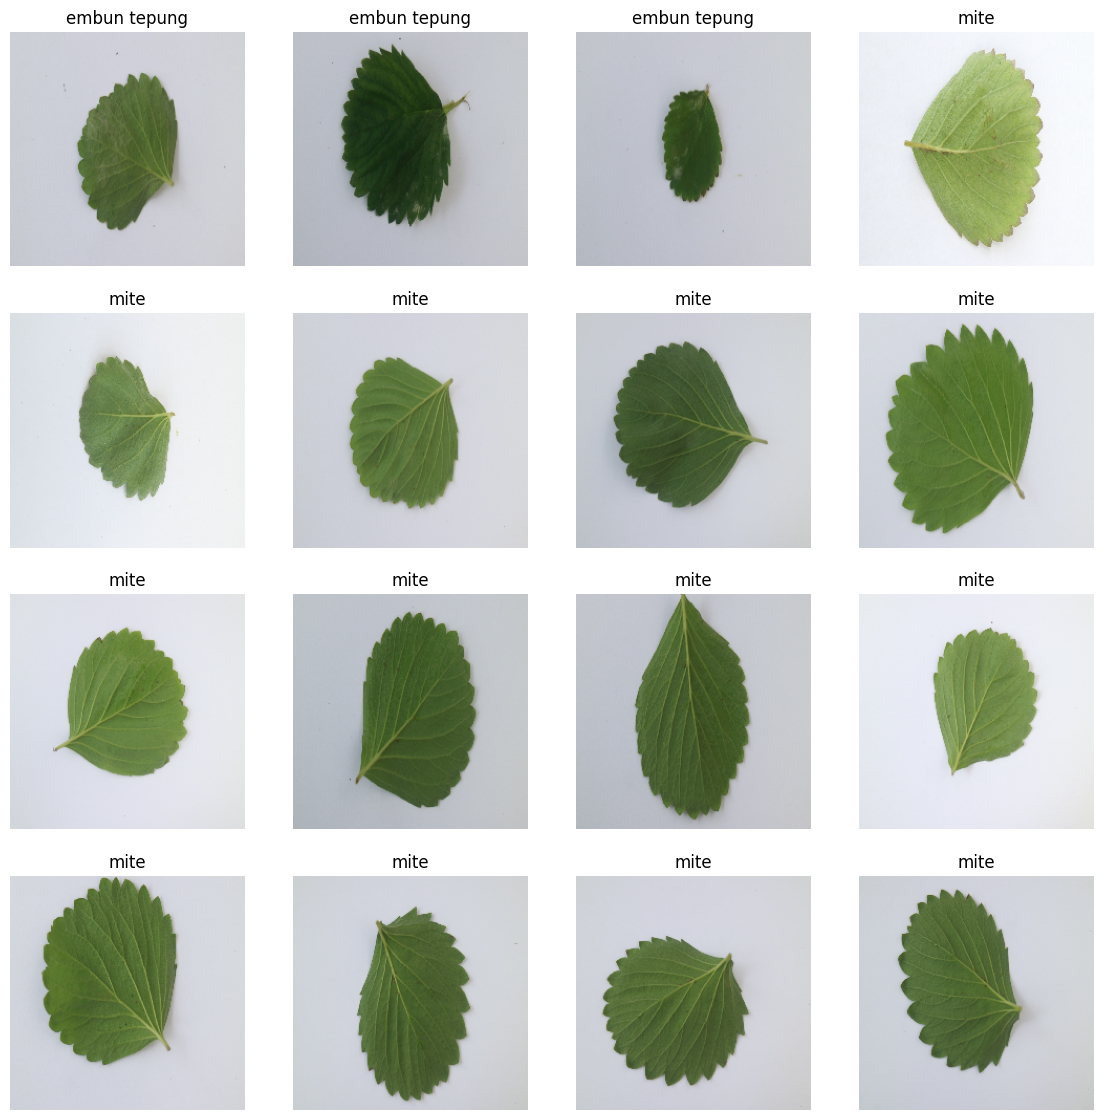

In [ ]:
x,y = next(test_ds)

# function to plot images
def plotImages(x,y):
    plt.figure(figsize=(14,14))
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.imshow(x[i].astype("uint8"))
        plt.title(class_names[np.argmax(y[i])])
        plt.axis("off")
    plt.show()

plotImages(x,y)

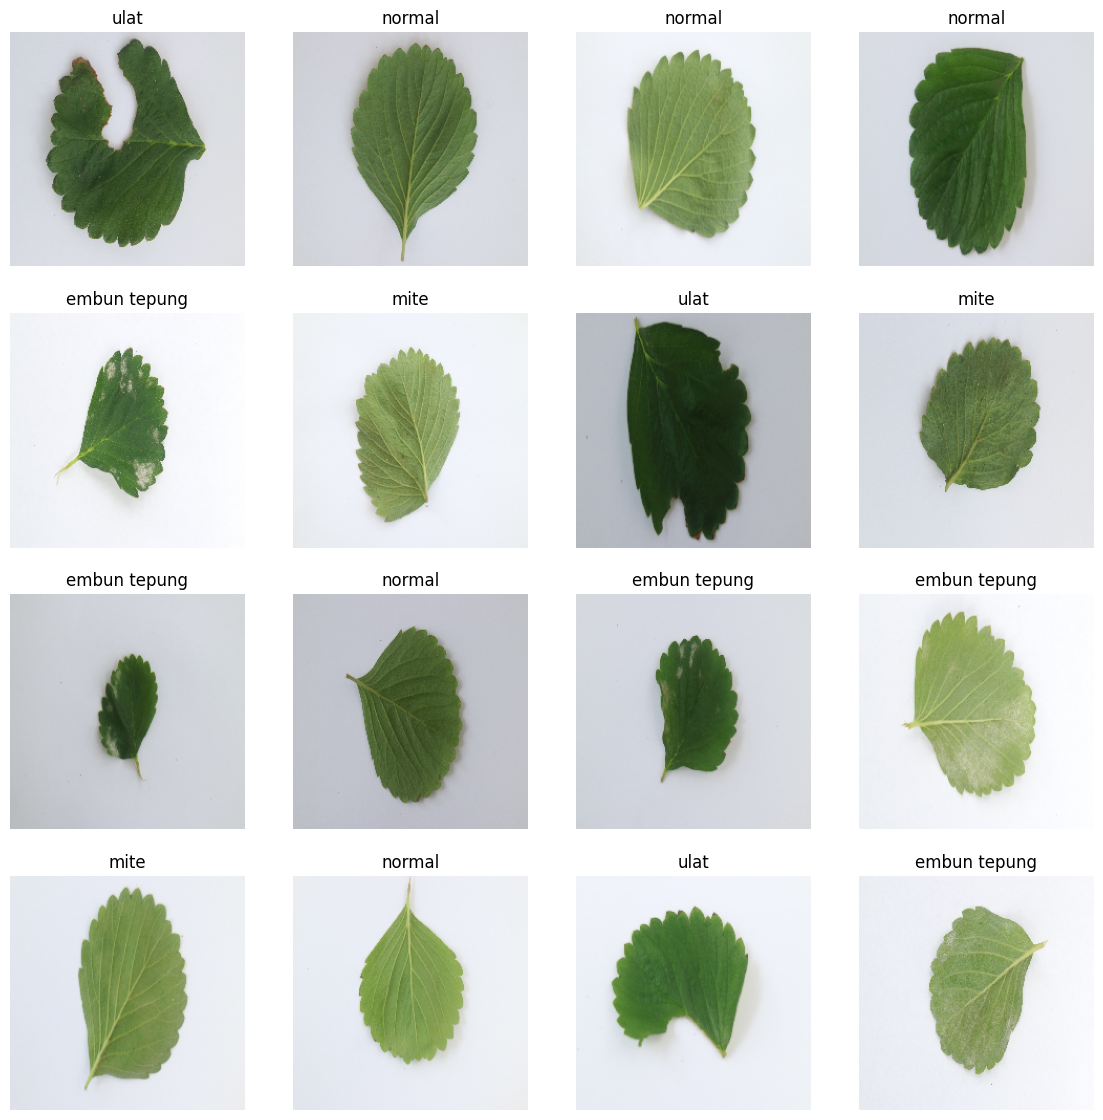

In [ ]:
x,y = next(val_ds)

# function to plot images
def plotImages(x,y):
    plt.figure(figsize=(14,14))
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.imshow(x[i].astype("uint8"))
        plt.title(class_names[np.argmax(y[i])])
        plt.axis("off")
    plt.show()

plotImages(x,y)

# Create Model

In [ ]:
mobilenet = MobileNetV3Large(input_shape=(224,224,3),
                        include_top=False,
                        weights='imagenet')

12683000/12683000 [==============================] - 0s 0us/step


In [ ]:
mobilenet.trainable = False
mobilenet.summary()

Model: "MobilenetV3large"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 Conv (Conv2D)                  (None, 112, 112, 16  432         ['rescaling[0][0]']              
                                )                                                                 
                                                                                   

In [ ]:
model = Sequential([
    mobilenet,
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MobilenetV3large (Functiona  (None, 7, 7, 960)        2996352   
 l)                                                              
                                                                 
 conv2d (Conv2D)             (None, 5, 5, 32)          276512    
                                                                 
 batch_normalization (BatchN  (None, 5, 5, 32)         128       
 ormalization)                                                   
                                                                 
 global_average_pooling2d (G  (None, 32)               0         
 lobalAveragePooling2D)                                          
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                        

Train Model

In [ ]:
model.compile(optimizer=optimizer.RMSprop(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['acc', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tfa.metrics.F1Score(num_classes=4)])

In [ ]:
history = model.fit(
    train_ds,
    epochs = 70,
    batch_size = BATCH_SIZE,
    validation_data = val_ds,
    verbose = 1
)

Epoch 1/70
30/30 [==============================] - 396s 13s/step - loss: 1.0054 - acc: 0.5773 - precision: 0.7581 - recall: 0.3530 - f1_score: 0.5732 - val_loss: 0.9489 - val_acc: 0.6098 - val_precision: 0.6471 - val_recall: 0.5833 - val_f1_score: 0.6068
Epoch 2/70
30/30 [==============================] - 78s 3s/step - loss: 0.7475 - acc: 0.7328 - precision: 0.8159 - recall: 0.5612 - f1_score: 0.7327 - val_loss: 0.7573 - val_acc: 0.7045 - val_precision: 0.7056 - val_recall: 0.6629 - val_f1_score: 0.7153
Epoch 3/70
30/30 [==============================] - 78s 3s/step - loss: 0.6178 - acc: 0.7833 - precision: 0.8433 - recall: 0.6524 - f1_score: 0.7842 - val_loss: 0.6149 - val_acc: 0.7197 - val_precision: 0.7391 - val_recall: 0.7083 - val_f1_score: 0.7312
Epoch 4/70
30/30 [==============================] - 77s 3s/step - loss: 0.5671 - acc: 0.8015 - precision: 0.8594 - recall: 0.6888 - f1_score: 0.8034 - val_loss: 0.5024 - val_acc: 0.7841 - val_precision: 0.8277 - val_recall: 0.7462 - val

# Hasil

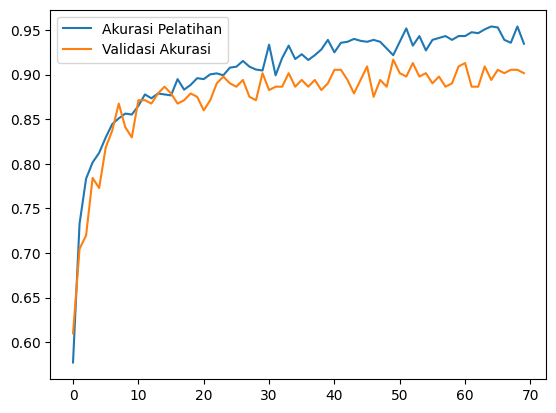

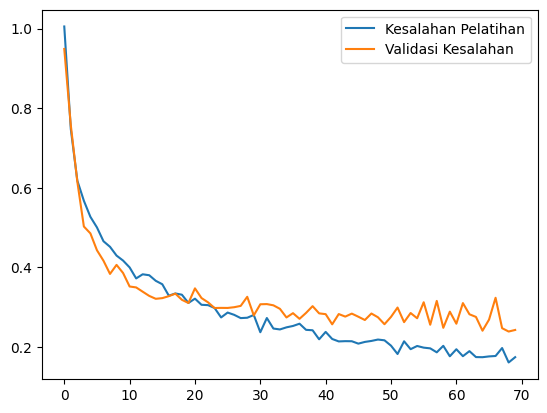

In [ ]:
plt.plot(history.history["acc"],label="Akurasi Pelatihan")
plt.plot(history.history["val_acc"],label="Validasi Akurasi")
plt.legend()
plt.show()

plt.plot(history.history["loss"],label="Kesalahan Pelatihan")
plt.plot(history.history["val_loss"],label="Validasi Kesalahan")
plt.legend()
plt.show()

# Evaluate

In [ ]:
scores_tr = model.evaluate(train_ds)

30/30 [==============================] - 54s 2s/step - loss: 0.0952 - acc: 0.9710 - precision: 0.9719 - recall: 0.9657 - f1_score: 0.9711


In [ ]:
scores_val = model.evaluate(val_ds)

9/9 [==============================] - 12s 1s/step - loss: 0.2423 - acc: 0.9015 - precision: 0.9105 - recall: 0.8864 - f1_score: 0.9018


In [ ]:
scores_test = model.evaluate(test_ds)

5/5 [==============================] - 37s 9s/step - loss: 0.2212 - acc: 0.9214 - precision: 0.9485 - recall: 0.9214 - f1_score: 0.9206


In [ ]:
import sklearn.metrics as metrics

In [ ]:
num_of_test_samples = 140

<ipython-input-37-6c896474d66e>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_ds, num_of_test_samples // BATCH_SIZE+1)


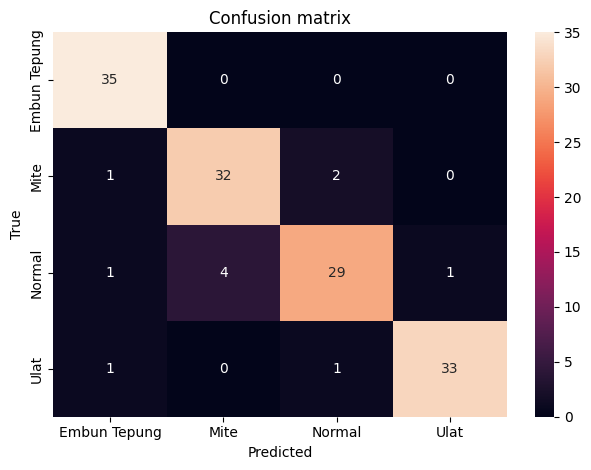

Classification Report
              precision    recall  f1-score   support

embun tepung       0.92      1.00      0.96        35
        mite       0.89      0.91      0.90        35
      normal       0.91      0.83      0.87        35
        ulat       0.97      0.94      0.96        35

    accuracy                           0.92       140
   macro avg       0.92      0.92      0.92       140
weighted avg       0.92      0.92      0.92       140



In [ ]:
predictions = model.predict_generator(test_ds, num_of_test_samples // BATCH_SIZE+1)
y_pred = np.argmax(predictions, axis=1)
true_classes = test_ds.classes
class_labels = list(test_ds.class_indices.keys())
cm = metrics.confusion_matrix(test_ds.classes, y_pred)
x_axis_labels = ['Embun Tepung','Mite','Normal','Ulat']
y_axis_labels = ['Embun Tepung','Mite','Normal','Ulat']
sns.heatmap(cm, xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion matrix')
plt.tight_layout()
plt.show()
print('Classification Report')
print(classification_report(true_classes, y_pred, target_names=class_labels))

# Prediction

In [ ]:
cd /content/drive/MyDrive/Dataset Stroberi/Buat Prediksi/

/content/drive/.shortcut-targets-by-id/1VcMAB8Y8ZPDceSDIjUGi5oxujM5YUap4/Dataset Stroberi/Buat Prediksi


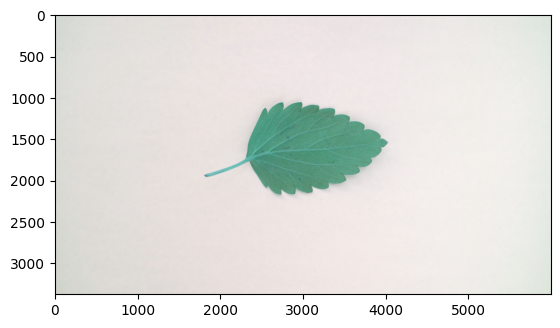

In [ ]:
image1='M2.JPG'

img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()

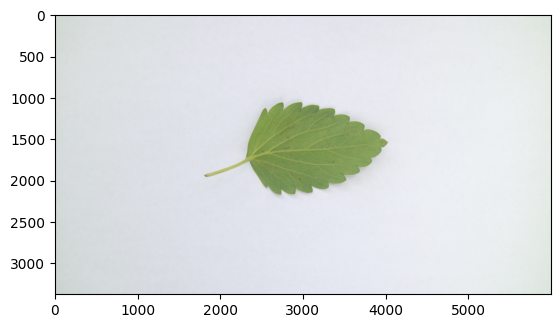

In [ ]:
img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
plt.imshow(img_array)
plt.show()

In [ ]:
from PIL import Image

image_testing = Image.open(image1)
image_testing = np.array(image_testing.resize((224,224)))
image_testing.shape

(224, 224, 3)

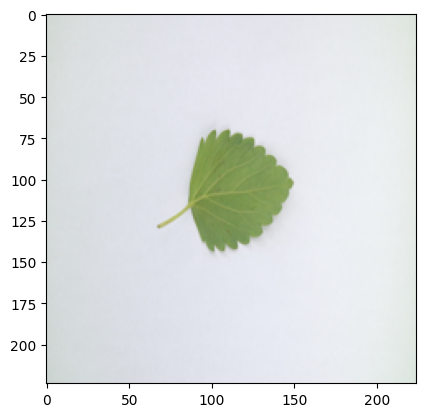

In [ ]:
plt.imshow(image_testing)
plt.show()

In [ ]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 224, 224, 3)


In [ ]:
output = model.predict(image_testing, 1)
print(output)

1/1 [==============================] - 2s 2s/step
[[8.5712159e-01 1.0094423e-01 4.1710429e-02 2.2376534e-04]]


# Convert to TfLite

In [ ]:
model.save('/content/drive/MyDrive/save/model/RevMobileNetv2-224-opt=RMSprop-lr=0,0001-epoch=70')

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.experimental_new_converter = True
tflite_model = converter.convert()
open("/content/drive/MyDrive/save/model/RevMobileNetv2-224-opt=RMSprop-lr=0,0001-epoch=70/tflite-convert.tflite", 'wb').write(tflite_model)

13013156